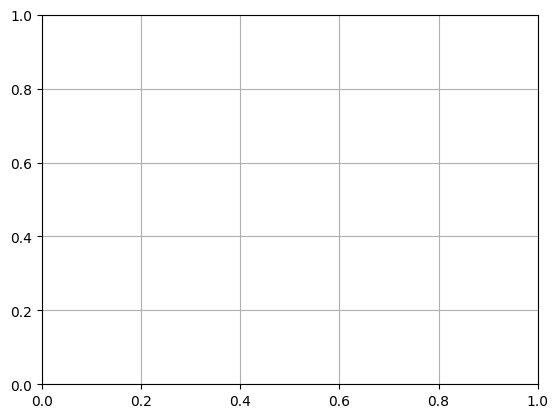

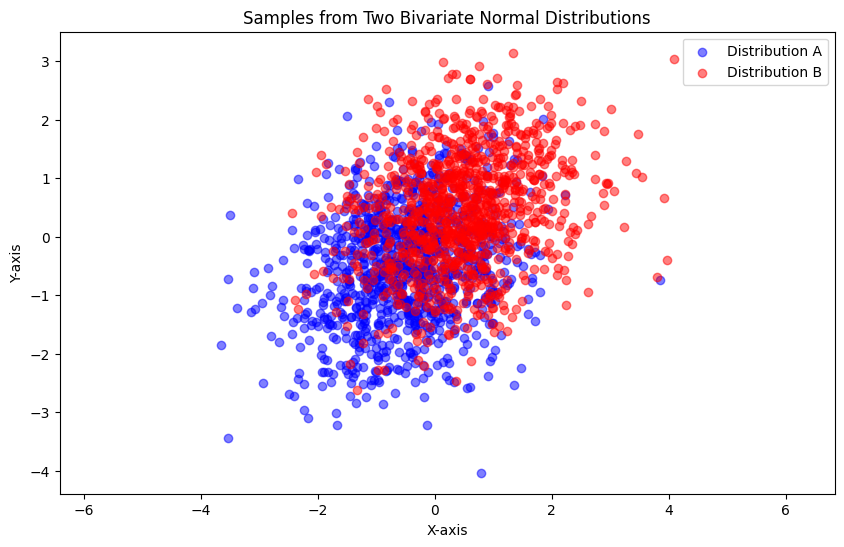

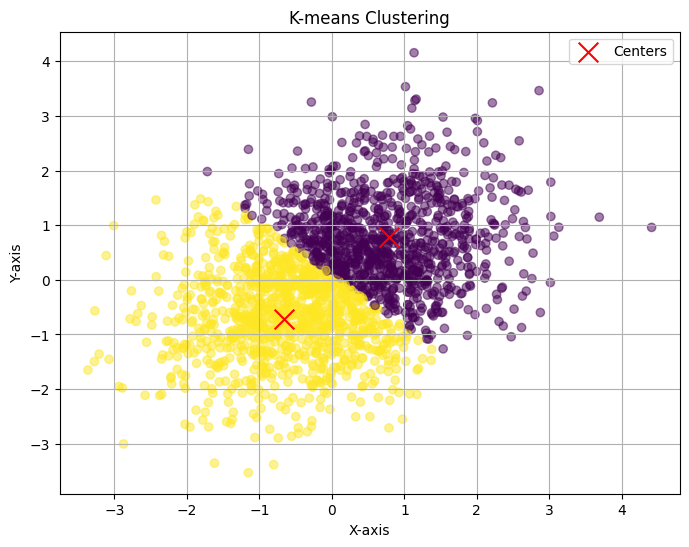

In [2]:
#Elias Zakarrya
#PART 1- Simulation of Multivariate Normal Distribution
import torch
import numpy as np
import matplotlib.pyplot as plt

m = 1000
mean_A = [-0.5, -0.5]
cov_A = [[1, 0.25], [0.25, 1]]

mean_B = [0.5, 0.5]
cov_B = [[1, 0.25], [0.25, 1]]

samples_A = np.random.multivariate_normal(mean_A, cov_A, m)
samples_B = np.random.multivariate_normal(mean_B, cov_B, m)

X = np.vstack((samples_A, samples_B))

plt.grid()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(samples_A[:, 0], samples_A[:, 1], color='blue', alpha=0.5, label='Distribution A')
plt.scatter(samples_B[:, 0], samples_B[:, 1], color='red', alpha=0.5, label='Distribution B')
plt.title('Samples from Two Bivariate Normal Distributions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')



#PART 2- K-Means Clustering
def generate_data():
    mean_A = torch.tensor([-0.5, -0.5])
    cov_A = torch.tensor([[1.0, 0.25], [0.25, 1.0]])
    data_A = torch.distributions.MultivariateNormal(mean_A, cov_A).sample((1000,))

    mean_B = torch.tensor([0.5, 0.5])
    cov_B = torch.tensor([[1.0, 0.25], [0.25, 1.0]])
    data_B = torch.distributions.MultivariateNormal(mean_B, cov_B).sample((1000,))

    data = torch.cat((data_A, data_B))
    return data


def kmeans(data, j=2, num_iterations=100):
    indices = torch.randperm(data.size(0))[:j]
    centers = data[indices]
    for _ in range(num_iterations):

        distances = torch.cdist(data, centers)
        cluster_labels = torch.argmin(distances, dim=1)

        for i in range(j):
            if (cluster_labels == i).any():
                centers[i] = data[cluster_labels == i].mean(dim=0)

    return centers, cluster_labels


def plot_clusters(data, centers, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels.numpy(), cmap='viridis', marker='o', alpha=0.5)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centers')
    plt.title('K-means Clustering')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid()
    plt.show()


if __name__ == "__main__":

    data = generate_data()

    j = 2
    centers, labels = kmeans(data, j)
    plot_clusters(data, centers, labels)


